In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
BATCH_SIZE = 64
LR = 0.0001
N_IDEAS = 5
ART_COMPONENTS = 15
PAINT_POINTS = np.vstack([np.linspace(-1,1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

In [3]:
PAINT_POINTS.shape

(64, 15)

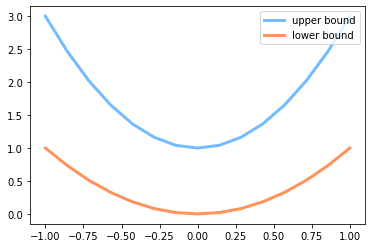

In [4]:
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [5]:
def artist_work():
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings_np = a * np.power(PAINT_POINTS, 2) + a-1
    paintings = torch.from_numpy(paintings_np).float()
    return paintings

In [6]:
artist_work()

tensor([[2.3409, 1.8977, 1.5227, 1.2159, 0.9773, 0.8068, 0.7046, 0.6705, 0.7046,
         0.8068, 0.9773, 1.2159, 1.5227, 1.8977, 2.3409],
        [2.3276, 1.8862, 1.5127, 1.2071, 0.9694, 0.7996, 0.6978, 0.6638, 0.6978,
         0.7996, 0.9694, 1.2071, 1.5127, 1.8862, 2.3276],
        [2.0228, 1.6218, 1.2825, 1.0049, 0.7890, 0.6348, 0.5422, 0.5114, 0.5422,
         0.6348, 0.7890, 1.0049, 1.2825, 1.6218, 2.0228],
        [1.7515, 1.3865, 1.0777, 0.8250, 0.6285, 0.4881, 0.4038, 0.3758, 0.4038,
         0.4881, 0.6285, 0.8250, 1.0777, 1.3865, 1.7515],
        [1.3030, 0.9975, 0.7390, 0.5275, 0.3630, 0.2455, 0.1750, 0.1515, 0.1750,
         0.2455, 0.3630, 0.5275, 0.7390, 0.9975, 1.3030],
        [1.7631, 1.3966, 1.0865, 0.8327, 0.6353, 0.4944, 0.4098, 0.3816, 0.4098,
         0.4944, 0.6353, 0.8327, 1.0865, 1.3966, 1.7631],
        [2.0086, 1.6095, 1.2718, 0.9955, 0.7806, 0.6271, 0.5350, 0.5043, 0.5350,
         0.6271, 0.7806, 0.9955, 1.2718, 1.6095, 2.0086],
        [2.7994, 2.2954, 1.

In [7]:
G = nn.Sequential(
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),
)

D = nn.Sequential(
    nn.Linear(ART_COMPONENTS, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

In [8]:
optim_d = torch.optim.Adam(D.parameters(), lr=LR)
optim_g = torch.optim.Adam(G.parameters(), lr=LR)

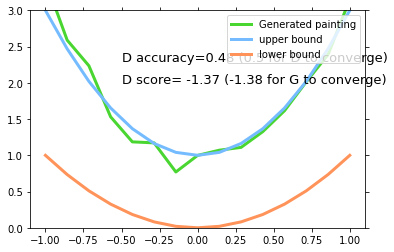

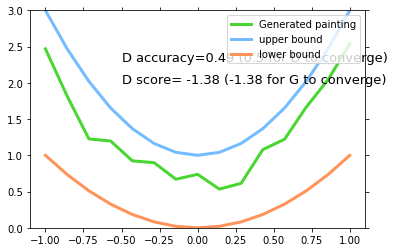

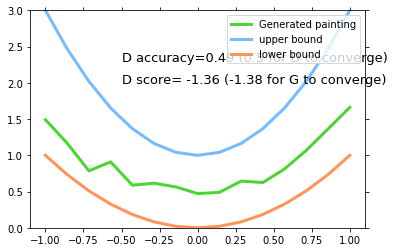

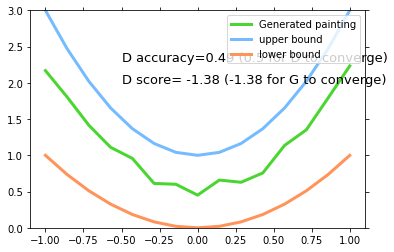

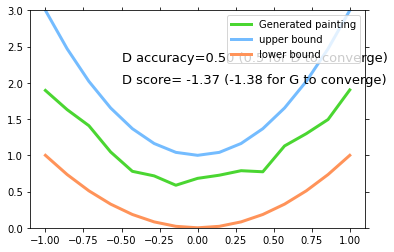

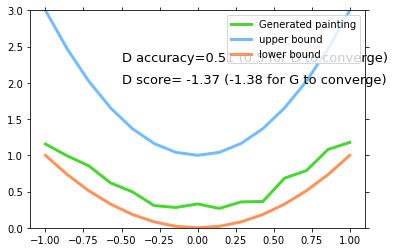

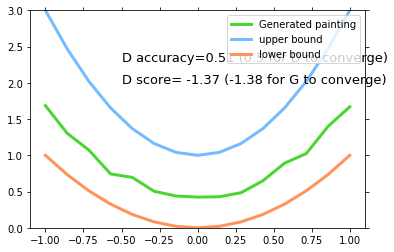

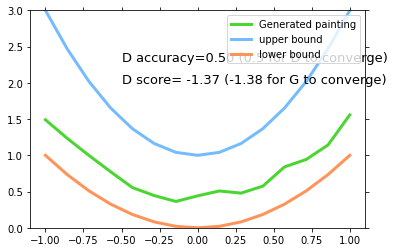

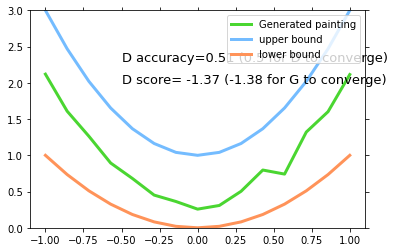

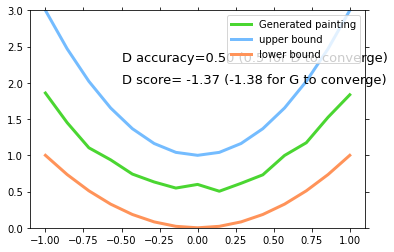

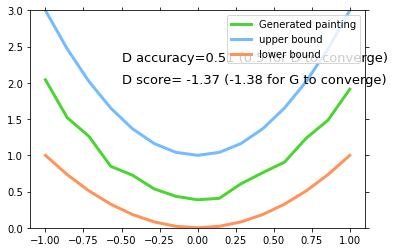

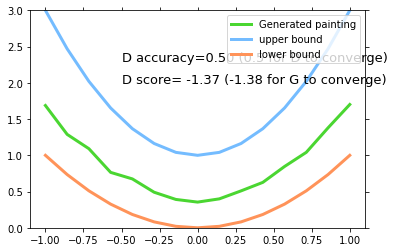

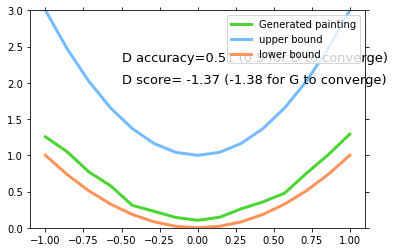

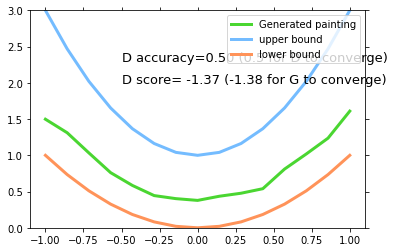

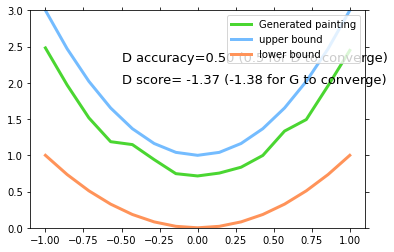

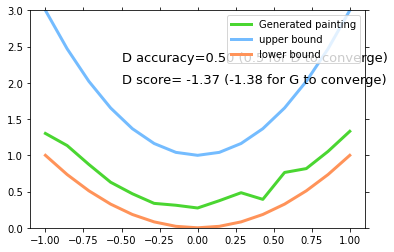

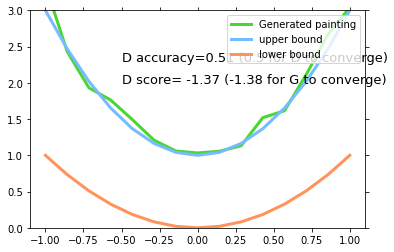

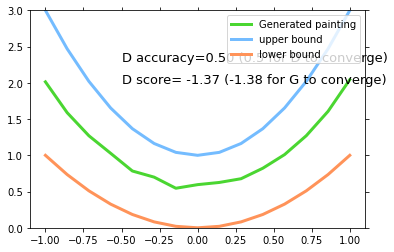

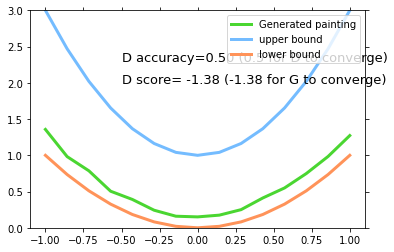

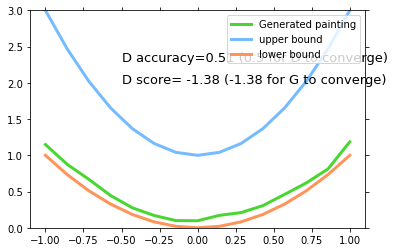

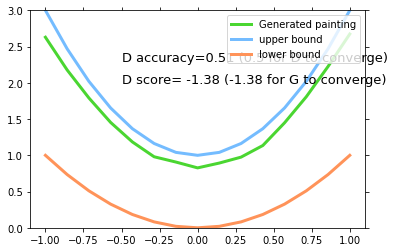

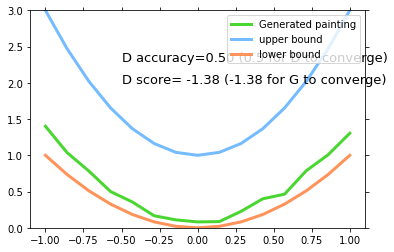

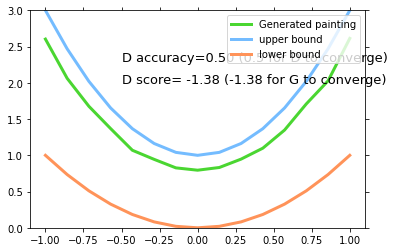

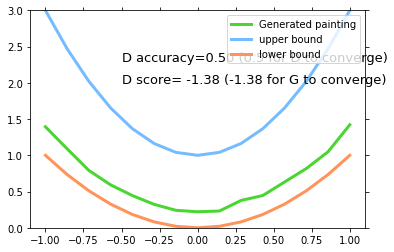

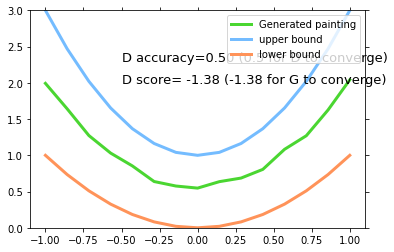

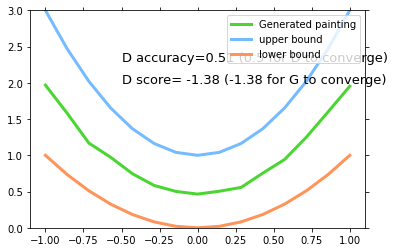

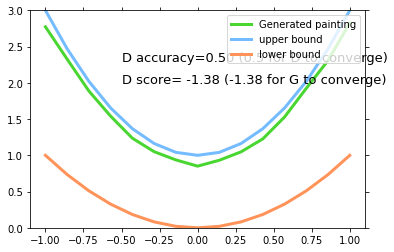

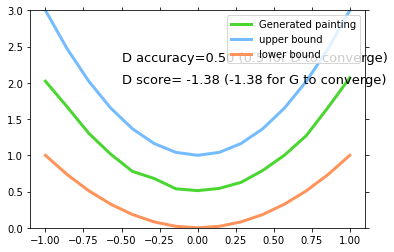

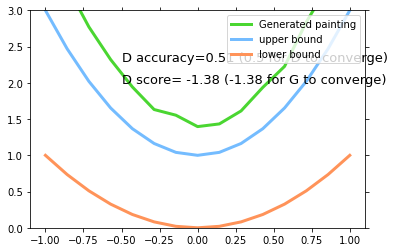

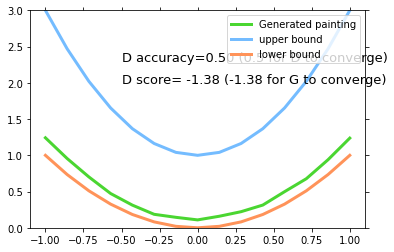

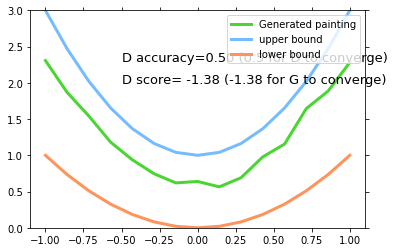

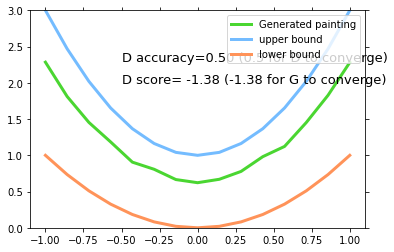

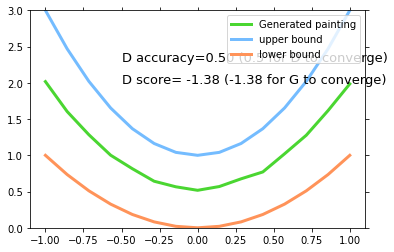

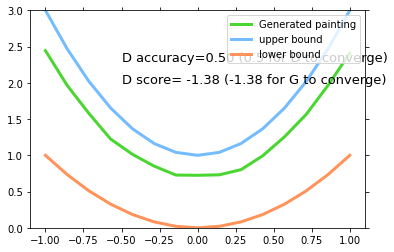

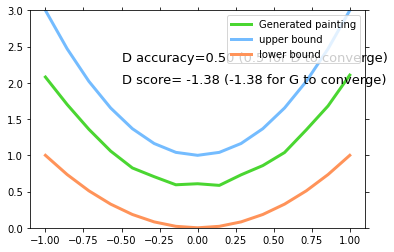

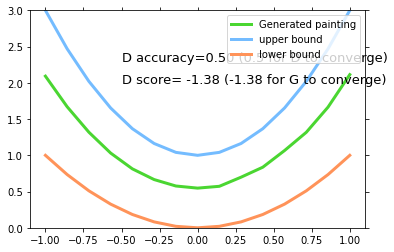

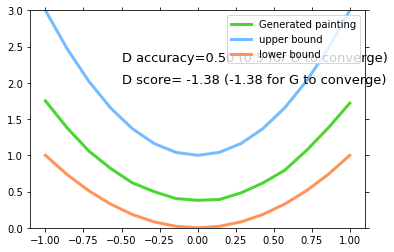

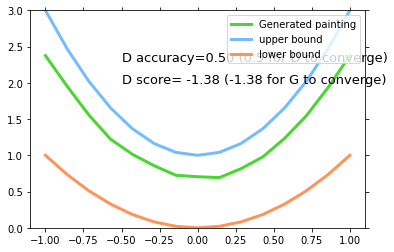

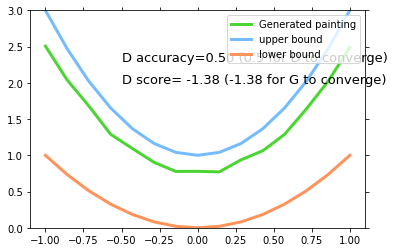

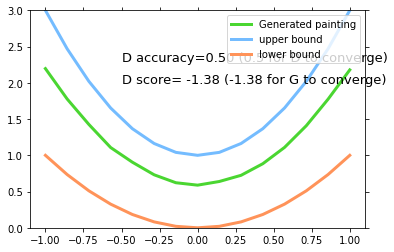

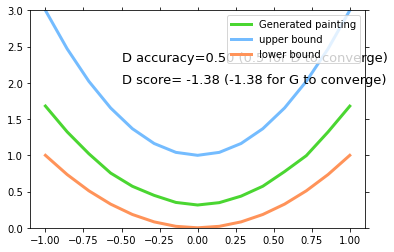

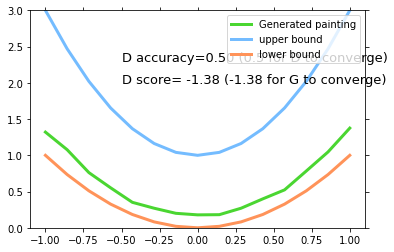

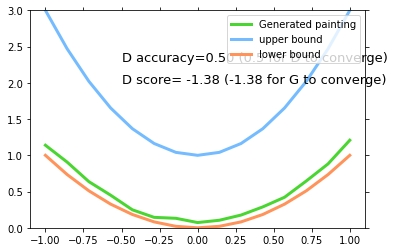

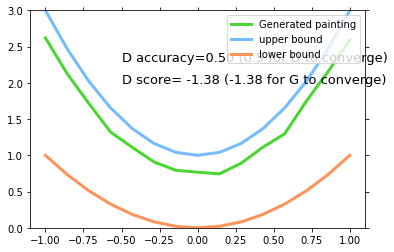

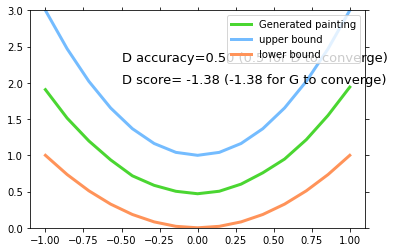

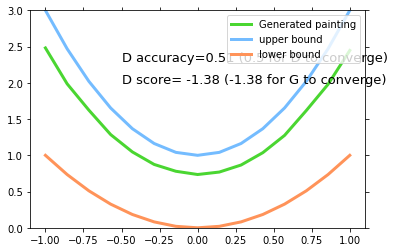

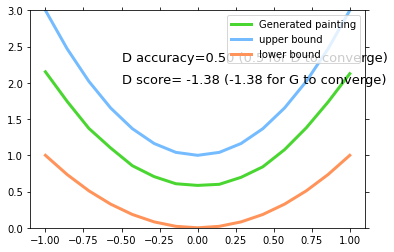

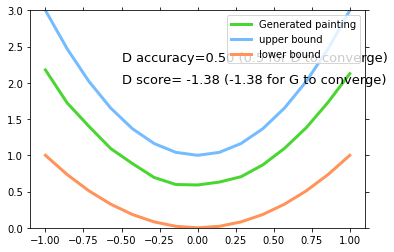

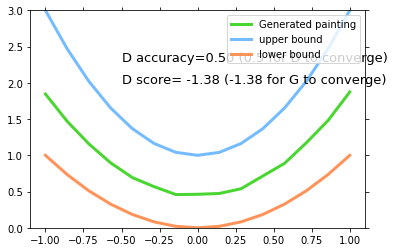

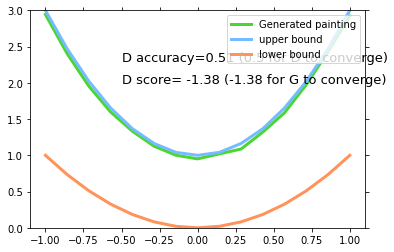

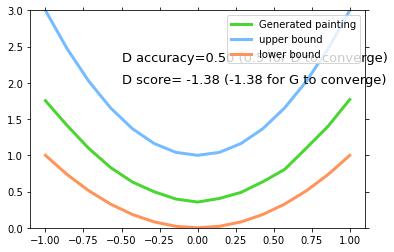

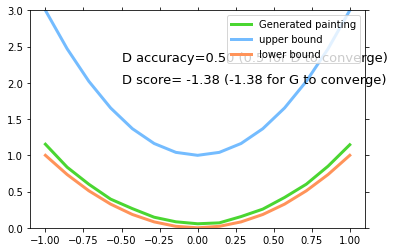

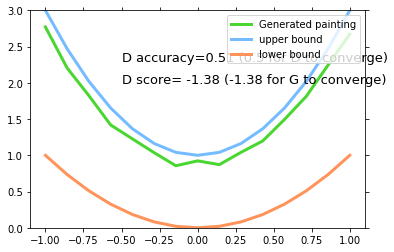

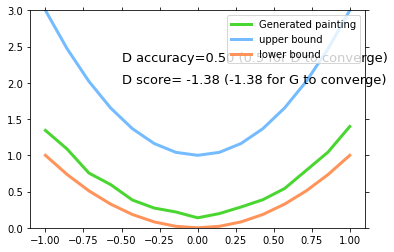

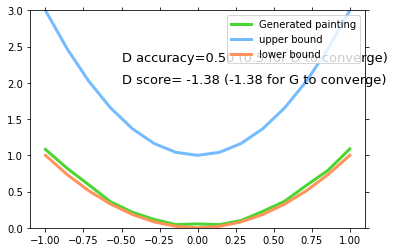

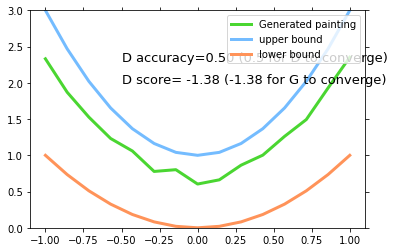

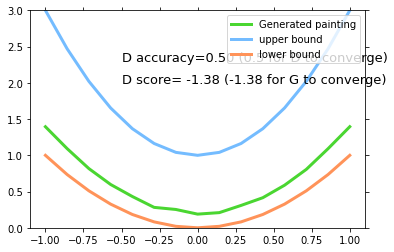

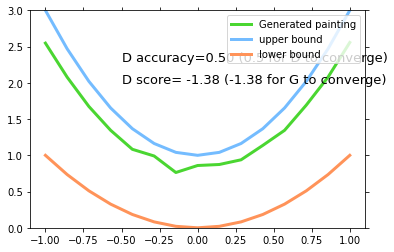

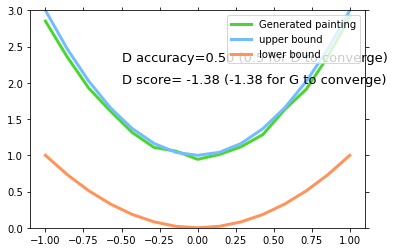

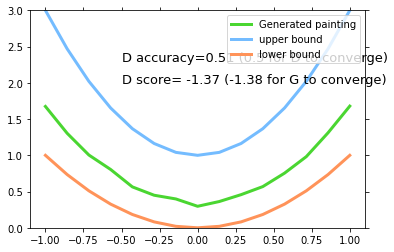

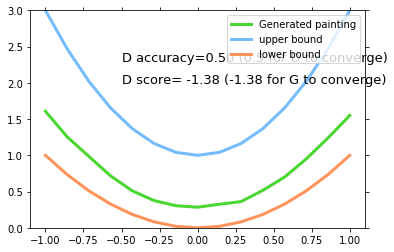

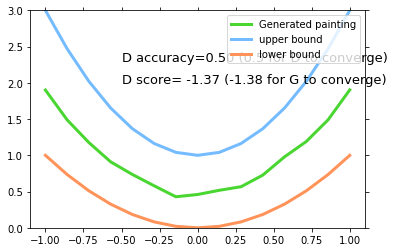

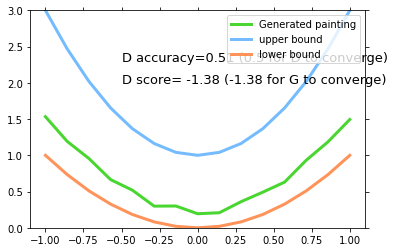

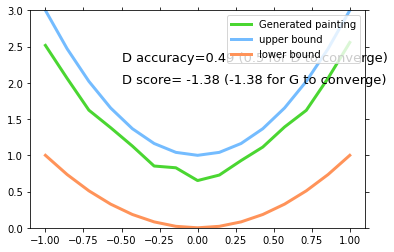

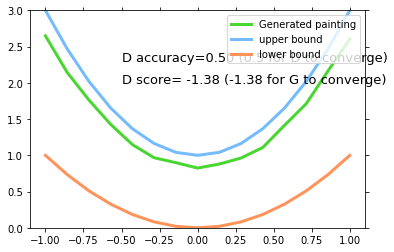

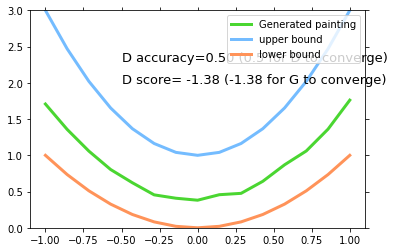

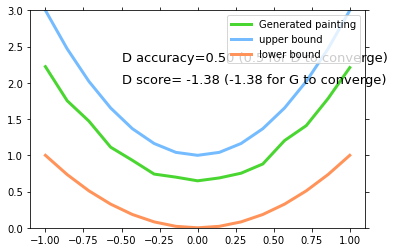

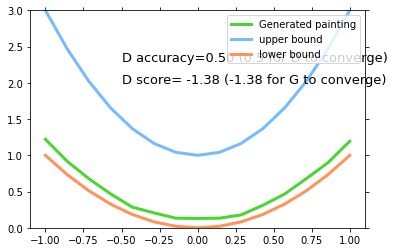

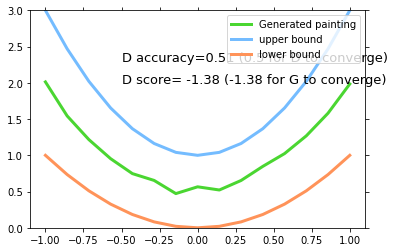

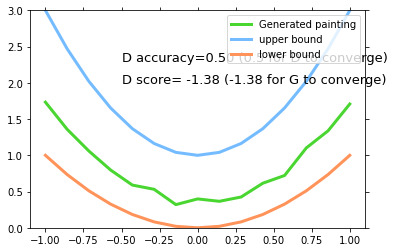

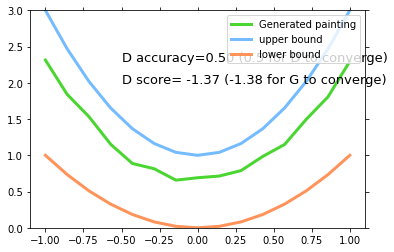

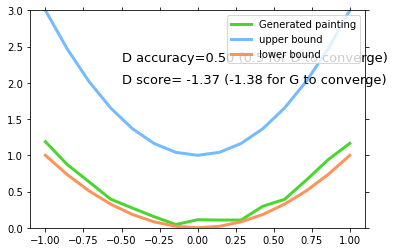

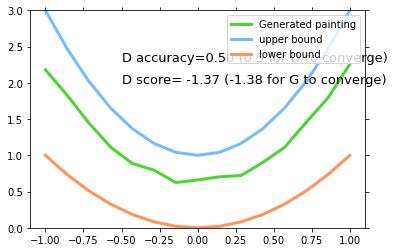

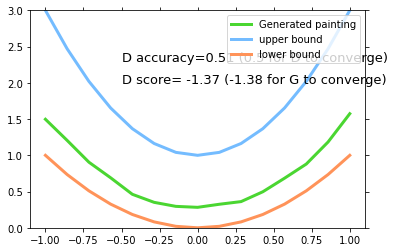

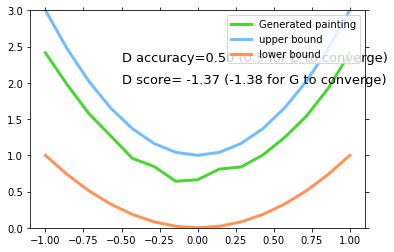

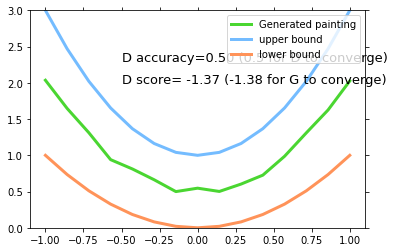

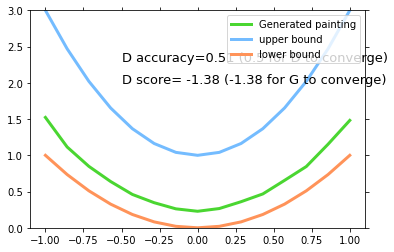

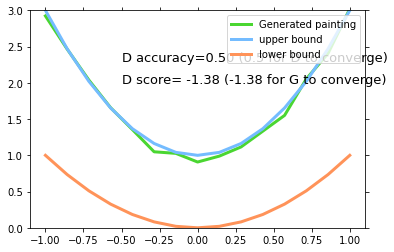

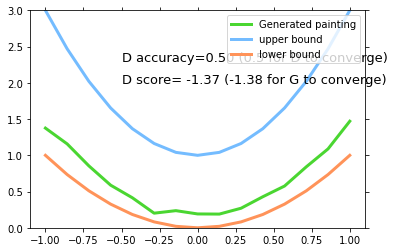

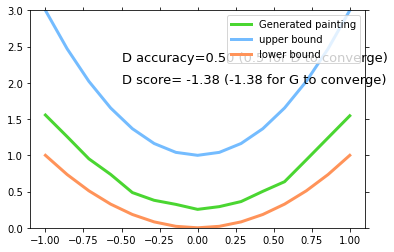

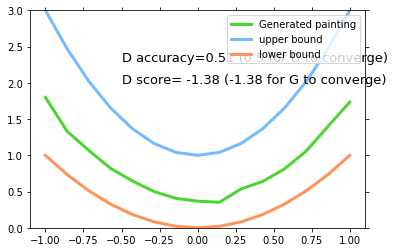

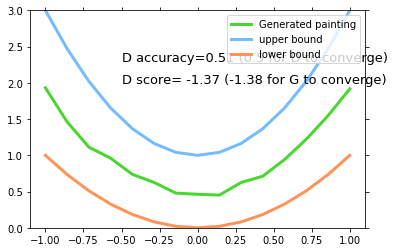

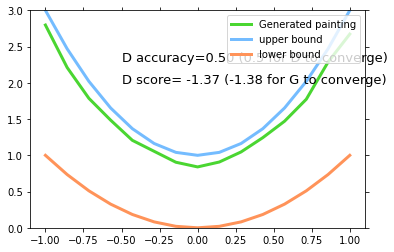

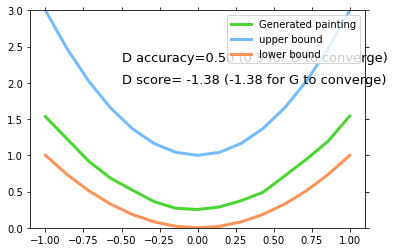

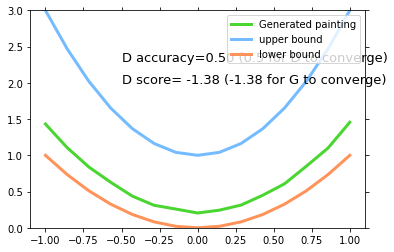

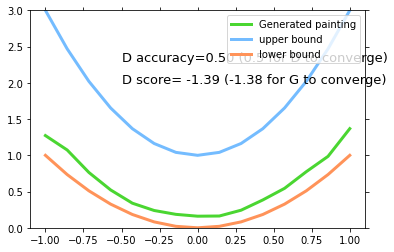

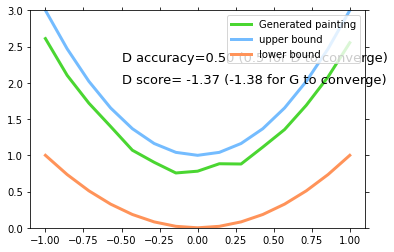

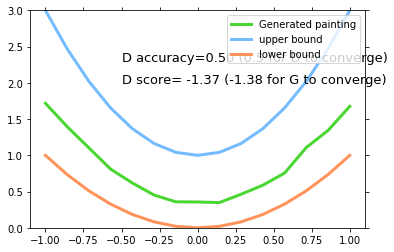

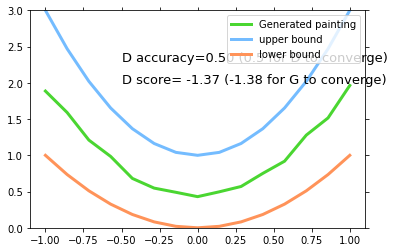

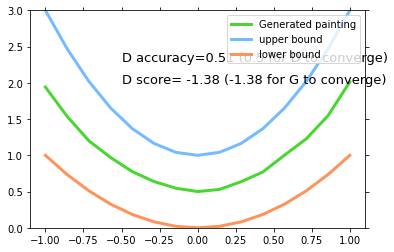

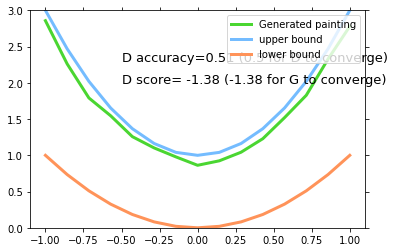

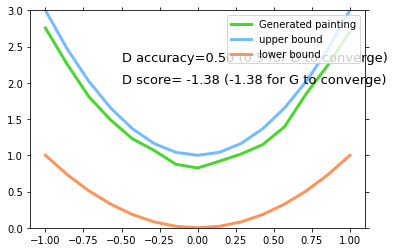

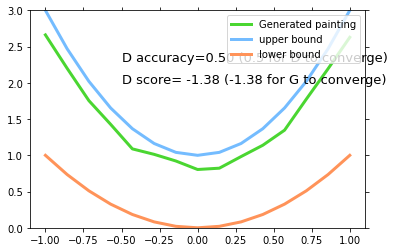

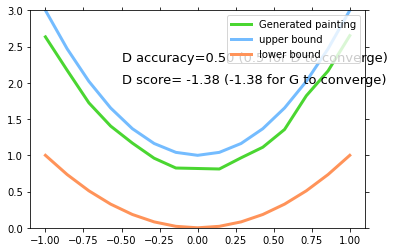

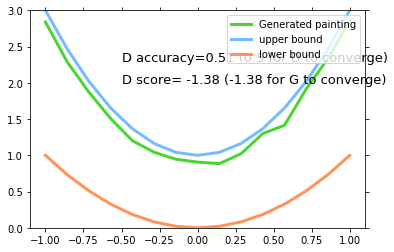

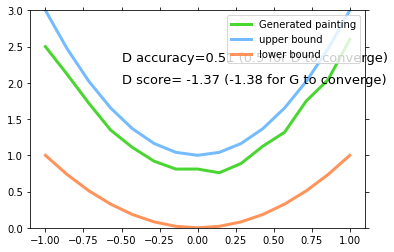

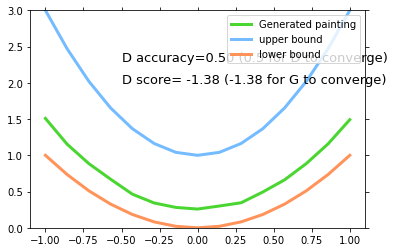

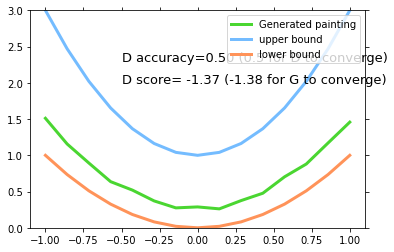

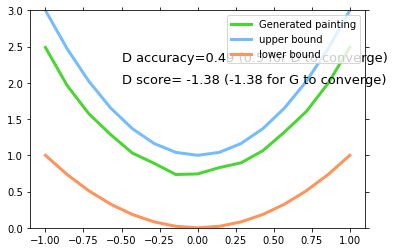

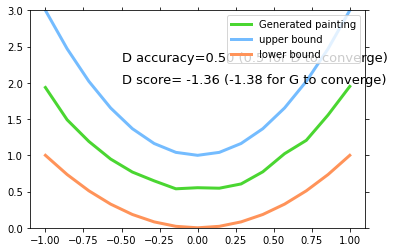

In [10]:
plt.ion()
for i in range(10000):
    artist_paintings = artist_work()
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)
    G_paintings = G(G_ideas)
    prob_artist1 = D(G_paintings)
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    optim_g.zero_grad()
    G_loss.backward()
    optim_g.step()

    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings.detach())
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    optim_d.zero_grad()
    D_loss.backward()
    optim_d.step()

    if i % 100 == 0:
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0],  2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0],  1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()
